In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from qs_opinf.constants import results_path

# import pandas as pd
from scipy.io import loadmat, savemat


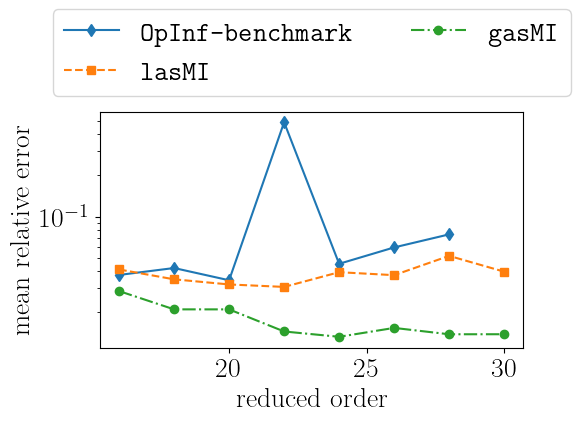

In [2]:
font = {"family": "normal", "weight": "bold", "size": 20}

matplotlib.rc("font", **font)
plt.rcParams["text.usetex"] = True

PATH1 = str(results_path / "Burgers_Dirichilet/NoStability/orders") + '/'
PATH2 = str(results_path / "Burgers_Dirichilet/LocalStability/orders") + '/' 
PATH3 = str(results_path / "Burgers_Dirichilet/GlobalStability/orders") + '/'


LABELS = [r"\texttt{OpInf-benchmark}", r"\texttt{lasMI}", r"\texttt{gasMI}"]
MARKERS = ["d", "s", "o"]
Err1 = []
Err2 = []
Err3 = []

Data1 = loadmat(PATH1 + f"simulation_error_order_20.mat")
reduced_orders = Data1["reduced_orders"].reshape(
    -1,
)

for r in reduced_orders:
    Data1 = loadmat(PATH1 + f"simulation_error_order_{r}.mat")
    Err1.append(Data1["errors"])

    Data2 = loadmat(PATH2 + f"simulation_error_order_{r}.mat")
    Err2.append(Data2["errors"])

    Data3 = loadmat(PATH3 + f"simulation_error_order_{r}.mat")
    Err3.append(Data3["errors"])


fig, ax = plt.subplots(figsize=(6, 5))
ax.semilogy(
    reduced_orders,
    np.array(Err1).reshape(
        -1,
    ),
    linestyle="-",
    marker=MARKERS[0],
    label=LABELS[0],
)
ax.semilogy(
    reduced_orders,
    np.array(Err2).reshape(
        -1,
    ),
    linestyle="--",
    marker=MARKERS[1],
    label=LABELS[1],
)
ax.semilogy(
    reduced_orders,
    np.array(Err3).reshape(
        -1,
    ),
    linestyle="-.",
    marker=MARKERS[2],
    label=LABELS[2],
)
ax.set(xlabel="reduced order", ylabel="mean relative error")

ax.legend(loc="center", bbox_to_anchor=(0.5, 1.25), ncol=2, fancybox=True, shadow=False)
plt.tight_layout()
fig.savefig(PATH1 + "../../" + f"compare_simulations_order.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../../" + f"compare_simulations_order.png", dpi=300, bbox_inches="tight")


16.242257791499622
0.9993353034411232
0.5600700831117704


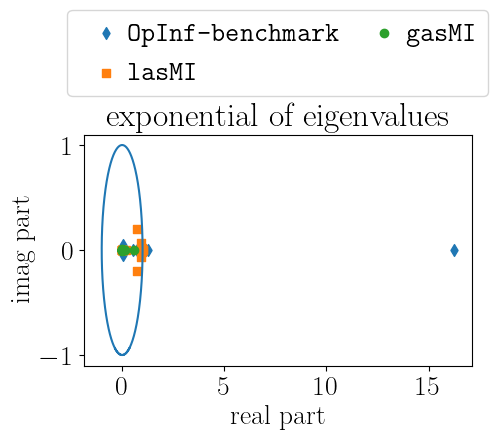

In [3]:
sele_r = 20
cir_pts = np.arange(-3.5, 3.5, 0.01)

Data1 = loadmat(PATH1 + f"simulation_error_order_{sele_r}.mat")
eigs1 = np.exp(Data1["eigs"])

Data2 = loadmat(PATH2 + f"simulation_error_order_{sele_r}.mat")
eigs2 = np.exp(Data2["eigs"])

Data3 = loadmat(PATH3 + f"simulation_error_order_{sele_r}.mat")
eigs3 = np.exp(Data3["eigs"])
print(np.max(np.real(eigs1)))
print(np.max(np.real(eigs2)))
print(np.max(np.real(eigs3)))

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(
    np.real(eigs1), np.imag(eigs1), linestyle="None", marker=MARKERS[0], label=LABELS[0]
)
ax.scatter(
    np.real(eigs2), np.imag(eigs2), linestyle="None", marker=MARKERS[1], label=LABELS[1]
)
ax.scatter(
    np.real(eigs3), np.imag(eigs3), linestyle="None", marker=MARKERS[2], label=LABELS[2]
)
ax.plot(np.sin(cir_pts), np.cos(cir_pts))
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.6),
    ncol=2,
    fancybox=True,
    shadow=False,
    handletextpad=-.2,
    columnspacing=0.5
)
ax.set(title="exponential of eigenvalues", xlabel="real part", ylabel="imag part")

fig.savefig(PATH1 + "../../" + f"compare_eigenvalues.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../../" + f"compare_eigenvalues.png", dpi=300, bbox_inches="tight")


In [4]:
PATH1

'/Users/goyalp/Manuscripts/Year_2023/quadratic-stable-opinf/Examples/Results/Burgers_Dirichilet/NoStability/orders/'

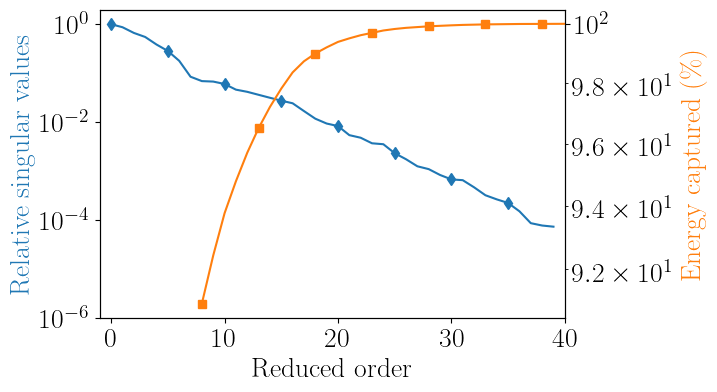

In [5]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

sing_vals = loadmat(PATH1 + f"simulation_error_order_20.mat")["sin_vals"].reshape(-1, 1)
rsing_vals = sing_vals / sing_vals[0]
orders = np.arange(len(rsing_vals))

energy_cap = np.zeros_like(sing_vals)
energy_cap[0] = rsing_vals[0]

for i in range(1, len(energy_cap)):
    energy_cap[i] = energy_cap[i - 1] + rsing_vals[i]


fig, ax = plt.subplots(figsize=(6, 4))
ax.semilogy(orders[:40], rsing_vals[:40], color=colors[0], marker="d", markevery=5)
ax.set_xlabel("Reduced order")
ax.set_ylabel("Relative singular values", color=colors[0])

ax2 = ax.twinx()

ax2.semilogy(
    orders[8:],
    100 * energy_cap[8:] / sum(rsing_vals),
    color=colors[1],
    marker="s",
    markevery=5,
)
ax2.set_ylabel("Energy captured (\%)", color=colors[1])

ax.set_xlim([-1, 40])
ax.set_ylim([1e-6, 2e0])

fig.savefig(PATH1 + "../../" + f"singular_value_decay.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../../" + f"singular_value_decay.png", dpi=300, bbox_inches="tight")


In [6]:
energy_cap[14] / sum(rsing_vals)


array([0.97206454])